<h1><b><i>Principal Component Analysis</i> (<i>PCA</i>) </b></h1>

<p>Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>ανάλυσης σε κύριες συνιστώσες</i></b> (<b><i>Principal Component Analysis</i></b>, <b><i>PCA</i></b>), υλοποιημένο σύμφωνα με τη <b><i>μέθοδο συνδιακύμανσης</i></b> (<b><i>covariance method</i></b>). Για να κατανοήσετε τη χρησιμότητα της μεθόδου θα εκπαιδεύσετε και θα αξιολογήσετε την ακρίβεια ενός μοντέλου <b><i>logistic regression</i></b> για ένα dataset πριν και μετά την εφαρμογή του αλγορίθμου <b><i>PCA</i></b>. Περισσότερες πληροφορίες για τη μέθοδο αυτή μπορείτε να αναζητήσετε <a href="https://ourarchive.otago.ac.nz/handle/10523/7534">εδώ</a>.</p>

<p>Η άσκηση περιλαμβάνει <b><i>δύο</i></b> προγράμματα <i>Python</i>: (a) το πρώτο δέχεται ένα dataset σε μορφή .<i>csv</i>, εφαρμόζει τον αλγόριθμο <b><i>PCA</i></b> και δημιουργεί το αρχείο <b><i>foo.csv</i></b> με το μετασχηματισμένο dataset, όπως προκύπτει από τις κύριες συνιστώσες που επέλεξε ο χρήστης να διατηρήσει, (b) το δεύτερο δέχεται ένα αρχείο σε μορφή .<i>csv</i>, διαχωρίζει το dataset σε <i>training</i> και <i>test set</i>, εκπαιδεύει ένα μοντέλο <b><i>logistic regression</i></b>, χρησιμοποιώντας το <i>training set</i> και υπολογίζει τον αριθμό των σφαλμάτων του μοντέλου πάνω στο <i>test set</i>.</p>

<p>Το dataset που θα χρησιμοποιήσετε παρέχεται σε δύο μορφές: (a) <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b> και (b) <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b>, το οποίο δεν περιλαμβάνει την πρώτη στήλη του <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b>, δηλαδή τα <i>labels</i> που αντιστοιχούν σε κάθε είσοδο. Τα datasets αυτά αποτελούν απλοποιημένη μορφή του dataset που μπορεί να βρεθεί <a href="https://archive.ics.uci.edu/ml/datasets/wine">εδώ</a>.</p>

<h3><b><i>Ανάλυση σε Κύριες Συνιστώσες</i></b></h3>
<p>Αρχικά, θα φορτώσετε τις βιβλιοθήκες που απαιτούνται για το πρόγραμμα που θα αναλύσει το dataset <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b> στις κύριες συνιστώσες του.</p>




In [1]:
#!pip install numpy
#https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
from numpy import genfromtxt
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

<p>Στη συνέχεια, θα φορτώσετε το dataset <b><i></i></b></p>

In [2]:
data = genfromtxt('https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3b.csv', delimiter=',')
print(data.shape) # (130,13)

(130, 13)


<p>Έπειτα, θα υπολογίσετε το μέσο όρο κάθε στήλης (feature) του dataset και θα κανονικοποιήσετε κάθε feature με αυτόν</p>

In [3]:
M = mean(data.T, axis=1) # (13)
data_normal = data - M

<p>Στη συνέχεια, θα υπολογίσετε το <b><i>πίνακα συνδιακύμανσης</i></b> (<b><i>covariance matrix</i></b>) για το dataset</p>

In [4]:
covariance = cov(data_normal.T)
print("The covariance matrix of the normalized data is the following: ")
print(covariance)

The covariance matrix of the normalized data is the following: 
[[ 7.89911157e-01  1.64350328e-02  5.03965534e-02 -1.39557561e+00
   4.51870543e+00  2.35123047e-01  3.56524806e-01 -2.92133512e-02
   9.15320632e-02  1.07205560e+00  3.92238044e-03  1.22678110e-01
   2.36909466e+02]
 [ 1.64350328e-02  7.74344335e-01  3.18039952e-02  4.24165474e-01
  -2.21434109e-01  1.44160704e-02  3.75581395e-02  5.34385808e-03
   6.47891175e-02 -1.54797734e-01 -6.06599761e-02  6.96007454e-02
  -3.33629219e+01]
 [ 5.03965534e-02  3.18039952e-02  8.83052117e-02  3.73006798e-01
   1.40136434e+00  4.12452594e-02  8.26573643e-02  5.81539654e-03
   1.24709839e-02  1.22397007e-01  2.06346094e-03  3.02871079e-02
   3.18556160e+01]
 [-1.39557561e+00  4.24165474e-01  3.73006798e-01  1.15631181e+01
  -6.46193798e+00 -4.24464222e-01 -4.52046512e-01  1.24282469e-01
  -1.77910614e-01 -2.39565069e+00 -2.05387955e-02 -1.02069171e-03
  -5.11872284e+02]
 [ 4.51870543e+00 -2.21434109e-01  1.40136434e+00 -6.46193798e+00
  

<p>Το επόμενο βήμα είναι να υπολογίσετε τις <b><i>ιδιοτιμές</i></b> (<b><i>eigenvalues</i></b>) και τα <b><i>ιδιοδιανύσματα</i></b> (<b><i>eigenvectors</i></b>) του dataset.</p>

In [5]:
values, vectors = eig(covariance)
print("The eigenvalues of the normalized data are the following: ")
print(values)

The eigenvalues of the normalized data are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00 1.32500169e+00
 8.10595669e-01 4.51081713e-01 2.69157831e-01 1.60993380e-01
 1.11100343e-01 6.13399000e-03 2.19782528e-02 3.20312852e-02
 5.87421686e-02]


<p>Στη συνέχεια, θα επιλέξετε τις πιο σημαντικές <b><i>ιδιοτιμές</i></b> και θα προσαρμόσετε αντίστοιχα τα <b><i>ιδιοδιανύσματα</i></b> του dataset.</p>

In [6]:
new_values = values[0:3]
print("The most important eigenvalues are the following: ")
print(new_values)
new_vectors = vectors[0:3]
print("The most important eigenvectors are the following: ")
print(new_vectors)

The most important eigenvalues are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00]
The most important eigenvectors are the following: 
[[-1.90615566e-03 -4.75319302e-04 -4.70065618e-02  2.25255930e-01
   9.82089183e-02 -2.20758056e-01 -8.52483156e-01 -3.65140031e-01
  -1.65925760e-01 -5.62139324e-03 -2.07811823e-02  2.48378617e-02
  -8.18675258e-04]
 [ 2.68379014e-04 -2.11118304e-03  3.21935310e-02  1.25115825e-01
   9.16405147e-01 -3.07909300e-01  1.86306127e-01  7.26209733e-02
  -1.81047372e-02 -1.16925805e-02  8.44468784e-02 -2.41209813e-02
   2.31770029e-02]
 [-2.56407459e-04 -4.21644285e-03  5.19948847e-02  4.67286333e-02
   2.01302236e-02 -3.45064791e-03 -1.57617050e-02  1.52544206e-01
  -7.18891029e-02 -1.38330530e-01 -6.68720003e-02  6.75337422e-01
  -6.97354965e-01]]


<p>Τώρα, θα εφαρμόσετε τα νέα <b><i>ιδιοδιανύσματα</i></b> στο παλιό dataset για να πάρετε το νέο, μειωμένο σε μέγεθος dataset.</p>

In [7]:
new_data = new_vectors.dot(data_normal.T) # (3,130)
print(new_data.shape)

(3, 130)


<p>Να αποθηκεύσετε το νέο dataset σε ένα αρχείο <i>csv</i>.</p>

In [8]:
np.savetxt("foo.csv", new_data.T, delimiter=",")

<h4><b><i>Ερωτήσεις</i></b></h4>
<ul>
<li>1. Να μελετήσετε το παραπάνω πρόγραμμα και να περιγράψετε, σύντομα, τα βήματα που ακολουθεί ο αλγόριθμος <b><i>PCA</i></b>, υλοποιημένος με τη μέθοδο <b><i>covariance</i></b>. Να συμπεριλάβετε και τις μαθηματικές πράξεις.</li>
<li>2. Να εφαρμόσετε τον αλγόριθμο <b><i>PCA</i></b> πάνω στα δεδομένα του αρχείου <i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i>.  Στη συνέχεια, να καταγράψετε τον <i>πίνακα συνδιακύμανσης</i> του dataset και τις ιδιοτιμές του πίνακα αυτού. Τι υποδηλώνουν οι θετικές και τι οι αρνητικές τιμές του <i>πίνακα συνδιακύμανσης</i>; Να διατάξετε τις <i>ιδιοτιμές</i> σε φθίνουσα σειρά. Τι παρατηρείτε για τις τρεις πρώτες σε σχέση με τις υπόλοιπες; Πόσες <i>κύριες συνιστώσες</i> επιλέγει να διατηρήσει ο αλγόριθμος;</li>
</ul>

### Aπαντήσεις 

#### 1. Βήματα PCA:

A. Οι διαστάσεις του dataset είναι (130, 13). Aφού πάρουμε το transpose του πίνακα (13,130) υπολογίζουμε το mean value ανα στήλη (13 Mean Values) και τα αφαιρούμε από κάθε τιμή σε κάθε γραμμή (από την κάθε διάσταση του πίνακα). 
$$ mean = \frac {\sum_{i=1}^{13} data(i,:)} { 13} $$
$$ data_n = data -mean $$ 

        
        Μιας άλλης μορφης normalization ειναι ο z-Normalization: 
$$ data_Z  = \frac {data - mean} { std } $$

B. Υπολογίζουμε το Covarianve Matrix (13,13) αφού ο πίνακας έχει 13 διαστάσεις.

$$ cov(data_1...data_{13}) = \frac {(\sum_{i=1}^{n=13} data_i - mean)} {n-1}  $$

C. Υπολογίζουμε τα eigenvectors(13,13) & eigenvalues(13) του covariance matrix.

    
      v: eigenvector λ: eigenvalue I: identity matrix  A: Covariance matrix
$$ A  v = \lambda v => A  v = I \lambda v => A  v - I \lambda v = 0 $$ 
$$ | A - \lambda I | = 0 $$

        Βρίσκουμε τα eigenvalues λύνοντας το παραπάνω σύστημα.

D. Aπό τα eigenvalues και eigenvectors που υπολογισαμε παπραπάνω κρατάμε τα 3 eigenvalues (μεγαλύτερα) και τα αντίστοιχα eigenvectors.

$$ sort(eigenvalues) => Feature Vector = (eig_1, eig_2, eig_3, ...)$$

E. Πολλαπλασιάζοντας τα αρχικά μας 'κανονικοποιημένα' δεδομένα  (130,13) με το διάνυσμα των παραπάνω eigenvectors(13,3) παίρνουμε τα τελικά δεδομένα (130,3) του PCA αξιοποιώντας τα 3 πιο principal components.

$$ Final Data = RowFeatureVector   *  RowDataAdjust $$ 

#### 2. PCA 
Tρέξαμε τον αλγόριθμο PCA στο **demo3b.csv** ακολουθώντας τα βήματα που αναφέρθηκαν παραπάνω 

Οι θετικές τιμές στον Covarianve matrix ανάμεσα σε 2 τιμές, σημάινουν ταυτόχρονη αύξηση των εν λογω μεταβλητών, ενώ αρνήτικη τιμή σημαίνει αύξηση της μιας μεταβλητής όταν η άλλη μειώνεται. 

In [9]:
print('Here is the covariance matrix (13,13):')
covariance


Here is the covariance matrix (13,13):


array([[ 7.89911157e-01,  1.64350328e-02,  5.03965534e-02,
        -1.39557561e+00,  4.51870543e+00,  2.35123047e-01,
         3.56524806e-01, -2.92133512e-02,  9.15320632e-02,
         1.07205560e+00,  3.92238044e-03,  1.22678110e-01,
         2.36909466e+02],
       [ 1.64350328e-02,  7.74344335e-01,  3.18039952e-02,
         4.24165474e-01, -2.21434109e-01,  1.44160704e-02,
         3.75581395e-02,  5.34385808e-03,  6.47891175e-02,
        -1.54797734e-01, -6.06599761e-02,  6.96007454e-02,
        -3.33629219e+01],
       [ 5.03965534e-02,  3.18039952e-02,  8.83052117e-02,
         3.73006798e-01,  1.40136434e+00,  4.12452594e-02,
         8.26573643e-02,  5.81539654e-03,  1.24709839e-02,
         1.22397007e-01,  2.06346094e-03,  3.02871079e-02,
         3.18556160e+01],
       [-1.39557561e+00,  4.24165474e-01,  3.73006798e-01,
         1.15631181e+01, -6.46193798e+00, -4.24464222e-01,
        -4.52046512e-01,  1.24282469e-01, -1.77910614e-01,
        -2.39565069e+00, -2.05387955e

- Διάταξη των ιδιοτιμών σε αύξουσα σειρά 

In [10]:
print("The eigenvalues of the normalized data are the following: ")
sorted_eigenvalues = np.sort(values)
print(sorted_eigenvalues[::-1])

plt.figure(figsize=(20,10))
plt.plot(sorted_eigenvalues[::-1], '*')
plt.title('Eigenvalues in Decreasing Order ')

The eigenvalues of the normalized data are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00 1.32500169e+00
 8.10595669e-01 4.51081713e-01 2.69157831e-01 1.60993380e-01
 1.11100343e-01 5.87421686e-02 3.20312852e-02 2.19782528e-02
 6.13399000e-03]


NameError: name 'plt' is not defined

Απο τις sorted eigenvalues παρατηρούμε ότι η πρώτη κύρια τιμή είναι αρκετές τάξεις μεγέθους μεγαλύτερη απο τις υπόλοιπες τιμές. Μετά τα 4 πρώτα eigenvalues παρατηρούμε ταχεία συρίκνωση των υπόλοιπων τιμων.

<h3><b><i>Logistic Regression</i></b></h3>

<p>Αρχικά, θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Στη συνέχεια, θα φορτώσετε τα datasets που θα χρησιμοποιηθούν για την εκπαίδευση του μοντέλου <b><i>logistic regression</i></b>. Στην πρώτη περίπτωση, θα εκπαιδεύσετε το μοντέλο, χρησιμοποιώντας το αρχείο <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i>. Στη δεύτερη περίπτωση, θα φορτώσετε το αρχείο <i>foo.csv</i> που πήρατε ως έξοδο από το προηγούμενο τμήμα κώδικα της άσκησης (<i>Ανάλυση σε Κύριες Συνιστώσες</i>), προσθέτοντας στην πρώτη στήλη του αρχείου τα labels που υπάρχουν στην πρώτη στήλη του αρχείου <a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv"><i>demo3a.csv</i></a>.

In [12]:
# demo3a.csv
import pandas as pd 
df_01 = pd.read_csv("https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv", header = None)

In [13]:
# Separate the input features from the target variable

x = df_01.iloc[:,1:13].values
y = df_01.iloc[:,0].values

In [15]:
df_01

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378
126,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342


<p>Έπειτα, θα χωρίσετε το dataset σε <i>training</i> και <i>test set</i>.</p>

In [16]:
df_02 = pd.read_csv("foo.csv", names=['eigenvalue_01', 'eigenvalue_02', 'eigenvalue_03'] )
df_02['Target'] = df_01[0]

In [17]:
# Separate the input features from the target variable

# Keep 3 Principal Components 
x = df_02.iloc[:,0:3].values
y = df_02.iloc[:,3].values

In [18]:
# Keep 2 Principal Components 
x = df_02.iloc[:,0:2].values
y = df_02.iloc[:,3].values

In [19]:
# Keep 1 Principal Components 
x = df_02.iloc[:,0:1].values
y = df_02.iloc[:,3].values

In [21]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

<p>Έπειτα, θα εκπαιδεύσετε το μοντέλο <b><i>Logistic Regression</i></b></p>

In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=1000)

<p>Τέλος, θα λάβετε τις προβλέψεις του μοντέλου που εκπαιδεύσατε πάνω στο test set και θα υπολογίσετε τα συνολικά λάθη.</p>

In [23]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]:
        errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
10


<h4><b><i>Ερώτηση</i></b></h4>
<p>Να εκτελέσετε παραπάνω τμήματα κώδικα με είσοδο τα αρχεία (a) <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i> και (b) <i>foo.csv</i>. Τι παρατηρείτε για την ακρίβεια του μοντέλου στις δύο περιπτώσεις; Δοκιμάστε και για την περίπτωση που κρατάμε (α) 1 και (β) 2 <i>κύριες συνιστώσες</i>. Τι παρατηρείτε;</p>

#### **Απάντηση**

Dataset:  **demo3a.csv**  Aριθμός σφαλμάτων: **2**. 

Dataset:  **foo.csv**     Principal Components: 3    Aριθμός σφαλμάτων: **1**. 

Dataset:  **foo.csv**     Principal Components: 2    Aριθμός σφαλμάτων: **2**. 

Dataset:  **foo.csv**     Principal Components: 1    Aριθμός σφαλμάτων: **9**. 

> Παρατηρούμε ότι η καλύτερη απόδοση της PCA ανάλυσης  είναι για **n_components=3**. Ενώ στην περίπτωση με **n_components=1** η απόδοση του μοντέλου είναι > σημαντικά χειρότερη από ότι να χρησιμοποιούσαμε το αρχικό dataset χωρίς καμία διαδικασία decomposition. O λόγος είναι ότι η διακύμανση των δεδομένων δέν μπορεί να επεξηγηθεί μόνο με ένα principal component.

Για την επαλήθευση του αριθμού των απαιτούμενων principal components που επεξηγούν το variance του παρόντος dataset, χρησιμοποιούμε ένα **screen plot** αντίστοιχο της **elbow method** από το Κ-means. Ωστόσο ενώ στο παρακάτω διάγραμμα 2 principal components φαίνεται να είναι επαρκή για την επεξήγηση του variance, ωστόσο η απόδοση στο test set είναι καλύτερη για 3 principal components.

In [24]:
from sklearn.preprocessing import StandardScaler # Z-Normalization
# Read the DataSet
df_01 = pd.read_csv("https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv", header = None)

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_01))
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.096991,1.452455,-0.294414,0.302478,-0.940375,1.768686,0.510421,0.775592,-0.462247,1.000229,0.892384,-0.112428,2.040025,0.782868
1,-1.096991,0.289066,-0.214558,-0.677197,-2.239324,0.006527,0.234327,0.367386,-0.646296,-0.878867,0.114374,-0.052918,0.941437,0.740152
2,-1.096991,0.243886,0.447106,1.113242,-0.054728,0.071792,0.510421,1.020516,-0.278198,1.967684,0.917082,-0.171937,0.455524,1.124598
3,-1.096991,1.610586,-0.020622,0.538951,-0.586117,0.854974,2.443085,1.360688,-0.830346,0.795575,2.226115,-1.183603,1.047071,1.964684
4,-1.096991,0.334246,0.709490,1.788880,0.653789,1.181300,0.510421,0.272138,0.550024,0.125798,0.077326,-0.112428,-0.051517,-0.156889


In [25]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=8)
data_PCA = pca.fit_transform(scaled_df)
df_PCA = pd.DataFrame(data_PCA)
df_PCA

,0,1,2,3,4,5,6,7
0,3.313518,0.169972,-0.235209,-0.233681,0.816913,-0.839228,0.196497,-0.303325
1,1.525604,-1.413705,-1.243934,0.624322,-0.494663,-0.923863,0.332499,0.522603
2,2.521503,1.053352,0.294206,-0.131670,0.240177,0.939082,0.300815,-1.100457
3,4.716520,0.449422,-0.255112,0.563082,-0.215629,0.209059,-1.199817,0.192571
4,1.037272,1.265576,1.774692,0.455036,0.652832,-0.206063,0.080311,0.356968
...,...,...,...,...,...,...,...,...
125,-1.804094,1.343587,-0.962781,0.148253,-1.059861,-0.186065,-0.721303,0.464987
126,-1.150152,1.422130,-0.661820,0.355375,-0.949928,0.930870,-2.094807,-0.068552
127,-2.942398,2.084394,2.589530,0.034890,-0.239658,1.013783,-0.704468,-0.624722
128,-2.371724,1.349047,-0.014339,-0.317954,-0.328490,0.406828,-0.832766,-0.693503


Text(0.5, 1.0, 'Screen Plot')

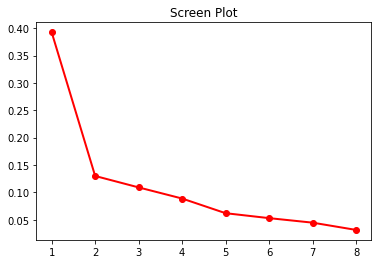

In [27]:
import matplotlib.pyplot as plt 
PCA_values = np.arange(pca.n_components_)+1
plt.plot(PCA_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Screen Plot')

<h3><b><i>Συμπληρωματικές Ερωτήσεις</i></b></h3>
<ul>
<li>1. Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς τη δυνατότητα <i>οπτικοποίησης</i> (<i>visualization</i>) των δεδομένων του dataset;</li>
<li>2. Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς την ταχύτητα εκπαίδευσης του μοντέλου logistic regression; Να βασίσετε την απάντησή σας στα δύο παρακάτω τμήματα κώδικα.</li>
</ul>

#### 1. Xρησιμότητα του PCA
> H χρησιμότητα του αλγορίθμου PCA είναι η μείωση των διαστάσεων των δεδομένων, η αναπαράστασή της δηλαδή με την χρήση λιγότερων συνιστώσεων. Με την οπτικοποίηση των δεδομένων χρησιμοποιώντας PCA κατανοούμε καλύτερα την συσχέτιση μεταξύ των χαρακτηριστικών του dataset. 

#### 2. PCA και ταχύτητα εκπαίδευσης 
> Με την χρήση κάποιων (μεγαλύτερων) principal components αντί του συνολικού dataset η ταχύτητα εκπαίδευσης του μοντέλου αναμένεται να συρικνωθεί σημαντικά. Παρόλα αυτά στο εν λόγο dataset λόγω του μικρού του μεγέθους δεν είναι ιδιαίτερα αισθητή η μείωση του χρόνου εκπαίδευσης κατά την εκτέλεση των εντολών ωστόσο με τον πιο κάτω κώδικα παρατηρούμε μείωση στον χρόνο εκπαίδευσης. 

> **Training_Timings**

In [28]:
import time 

# demo3a.csv
df_01 = pd.read_csv("https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv", header = None)

# Separate the input features from the target variable

x = df_01.iloc[:,1:13].values
y = df_01.iloc[:,0].values

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

time_table=[]

start_time = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
time_table.append(time.time() - start_time)

######################################################################
df_02 = pd.read_csv("foo.csv", names=['eigenvalue_01', 'eigenvalue_02', 'eigenvalue_03'] )
df_02['Target'] = df_01[0]



# Keep 3 Principal Components 

x = df_02.iloc[:,0:3].values
y = df_02.iloc[:,3].values

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

start_time = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
time_table.append(time.time() - start_time)

######################################################################
x = df_02.iloc[:,0:2].values
y = df_02.iloc[:,3].values

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

start_time = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
time_table.append(time.time() - start_time)
######################################################################
x = df_02.iloc[:,0:2].values
y = df_02.iloc[:,3].values

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

start_time = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
time_table.append(time.time() - start_time)

time_table = np.array(time_table)
print(time_table)


[0.07343578 0.00759649 0.00642586 0.00560427]


In [30]:
d = {'All_Data': [time_table[0]], 'PCA_03': [time_table[1]],'PCA_02': [time_table[2]],'PCA_01': [time_table[3]]}
Training_Timings  = pd.DataFrame(data=d)

print(' Training Timings in seconds:\n',Training_Timings)


 Training Timings in seconds:
    All_Data    PCA_03    PCA_02    PCA_01
0  0.073436  0.007596  0.006426  0.005604
